## Objective
#### Make a Query in which we enter a Track_id and that track_id fetch all the tracks of the album from its belong And check how many people purchased full albums

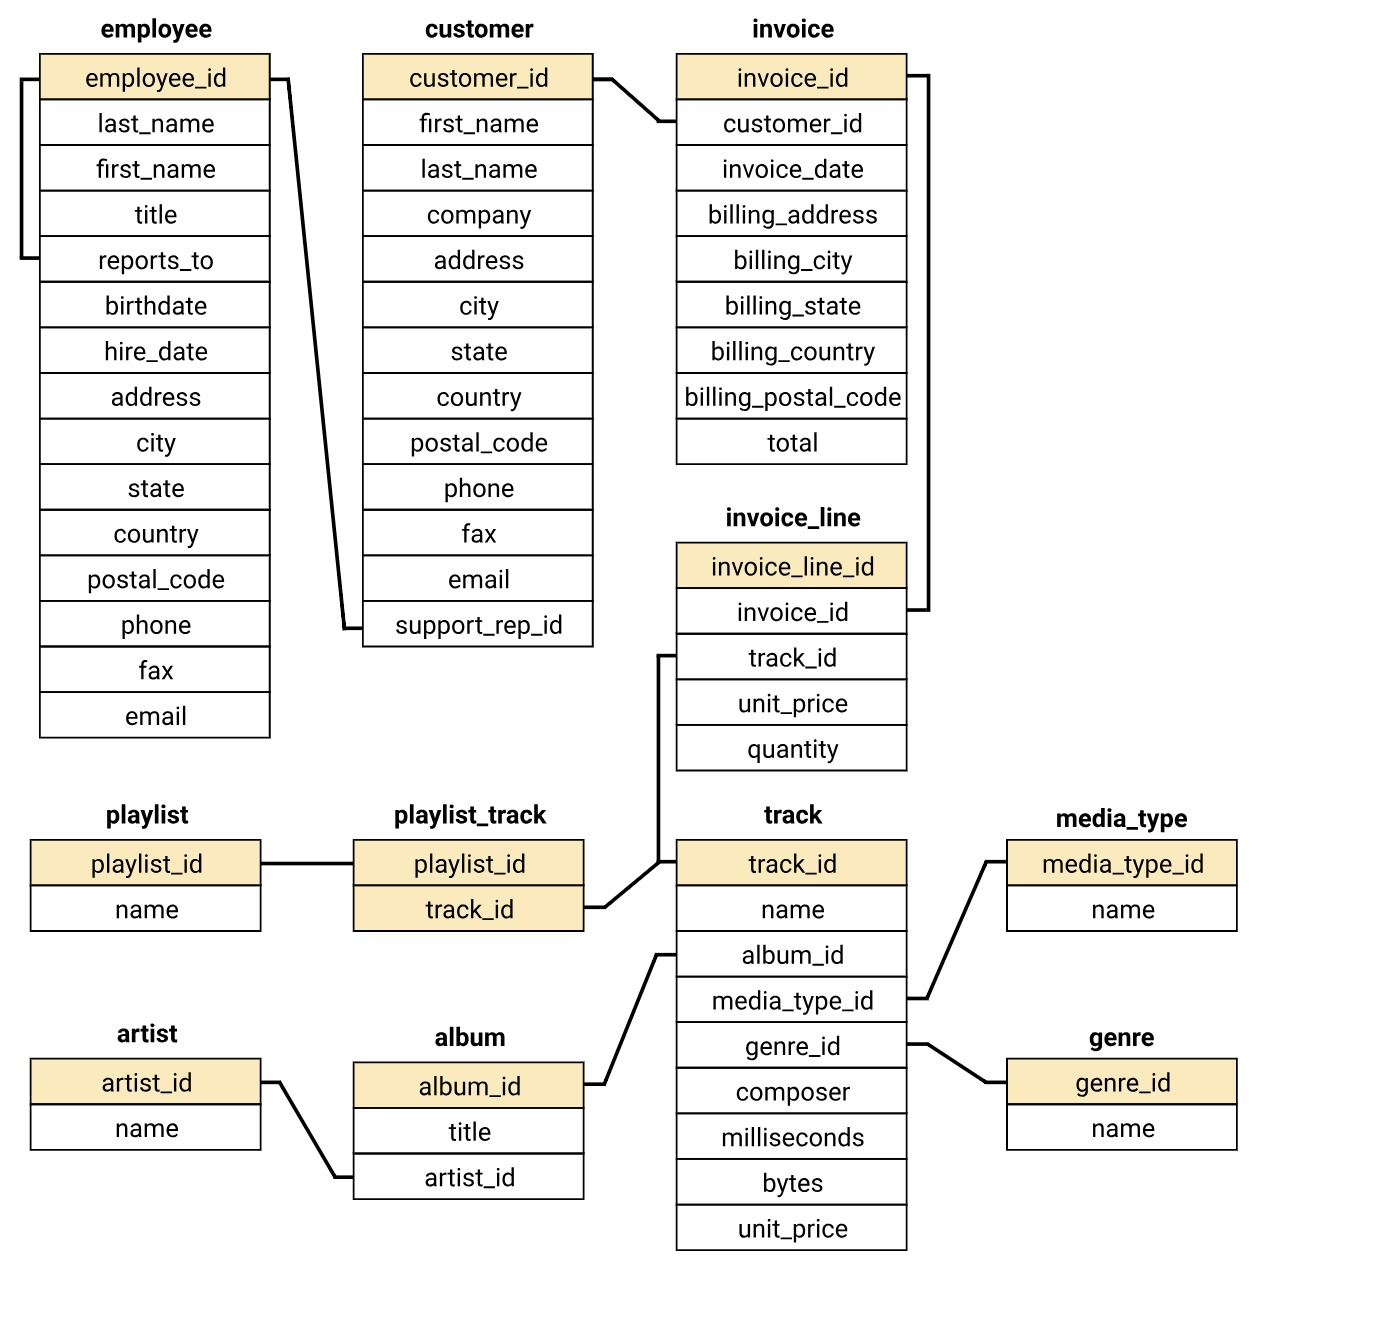

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
db = 'chinook.db'

def query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q,conn)

In [3]:
q = """
SELECT t1.track_id, t1.album_id, t2.track_id, t2.album_id FROM track t1
inner join track t2 on
t1.album_id = t2.album_id
"""
query(q)

,track_id,album_id,track_id,album_id
0,1,1,1,1
1,1,1,6,1
2,1,1,7,1
3,1,1,8,1
4,1,1,9,1
...,...,...,...,...
52366,3499,343,3499,343
52367,3500,344,3500,344
52368,3501,345,3501,345
52369,3502,346,3502,346


In [4]:
q = """ 
SELECT t2.track_id,t2.album_id FROM track t1
inner join track t2 on 
t1.album_id = t2.album_id 
where t1.track_id = 1158
"""
query(q)

,track_id,album_id
0,1158,91
1,1159,91
2,1160,91
3,1161,91
4,1162,91
5,1163,91
6,1164,91
7,1165,91
8,1166,91
9,1167,91


In [5]:
q = """
select il.track_id from invoice_line il
where il.invoice_id = 1
"""
query(q).head(30)

,track_id
0,1158
1,1159
2,1160
3,1161
4,1162
5,1163
6,1164
7,1165
8,1166
9,1167


In [6]:
q = """
select t2.track_id from track t1
inner join track t2
on
t1.album_id = t2.album_id
where t1.track_id = 1158
except
select il.track_id from invoice_line il
where il.invoice_id = 1
"""
query(q)

,track_id


In [7]:
q = """
select invoice_id, max(track_id) from invoice_line 
group by 1
having invoice_id = 1
"""
query(q)

,invoice_id,max(track_id)
0,1,1173


In [8]:
q = """
select invoice_id, min(track_id) from invoice_line 
group by 1
having invoice_id = 1
"""
query(q)

,invoice_id,min(track_id)
0,1,1158


##### creating temporary view

In [9]:
q = """
with invoice_data as
(select invoice_id, max(track_id) from invoice_line
group by 1
having invoice_id = 2)
select * from invoice_data
"""
query(q)

,invoice_id,max(track_id)
0,2,3476


In [10]:
q = """
WITH invoice_data AS (
    SELECT invoice_id, MIN(track_id) AS min_track_id
    FROM invoice_line 
    GROUP BY invoice_id
    HAVING invoice_id = 1
)

SELECT invoice_id,
    CASE
        WHEN (
            SELECT t2.track_id 
            FROM track t1
            INNER JOIN track t2
            ON t1.album_id = t2.album_id
            WHERE t1.track_id = invd.min_track_id
            EXCEPT
            SELECT il.track_id 
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        ) IS NULL
        THEN 'Yes'
        ELSE 'No'
    END AS Purchased_Album
FROM invoice_data invd;
"""
query(q)


,invoice_id,Purchased_Album
0,1,Yes


In [11]:
q = """
WITH invoice_data AS (
    SELECT invoice_id, MIN(track_id) AS min_track_id
    FROM invoice_line 
    GROUP BY invoice_id
    
)
SELECT invoice_id,
    CASE
        WHEN (
            SELECT t2.track_id 
            FROM track t1
            INNER JOIN track t2
            ON t1.album_id = t2.album_id
            WHERE t1.track_id = invd.min_track_id
            EXCEPT
            SELECT il.track_id 
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        ) IS NULL
        THEN 'Yes'
        ELSE 'No'
    END AS Purchased_Album
FROM invoice_data invd;

"""
query(q)


,invoice_id,Purchased_Album
0,1,Yes
1,2,No
2,3,No
3,4,No
4,5,Yes
...,...,...
609,610,No
610,611,No
611,612,Yes
612,613,No


In [12]:
q= """
WITH invoice_data AS (
    SELECT invoice_id, MIN(track_id) AS min_track_id
    FROM invoice_line 
    GROUP BY invoice_id
),
Purchased_Album AS (
    SELECT invoice_id,
        CASE
            WHEN (
                SELECT t2.track_id 
                FROM track t1
                INNER JOIN track t2
                ON t1.album_id = t2.album_id
                WHERE t1.track_id = invd.min_track_id
                EXCEPT
                SELECT il.track_id 
                FROM invoice_line il
                WHERE il.invoice_id = invd.invoice_id
            ) IS NULL
            THEN 'Yes'
            ELSE 'No'
        END AS Purchased_Album
    FROM invoice_data invd
)
SELECT Purchased_Album, COUNT(invoice_id) AS No_of_invoices FROM Purchased_Album
group by 1
"""
query(q)

,Purchased_Album,No_of_invoices
0,No,497
1,Yes,117


In [13]:
q= """
WITH invoice_data AS (
    SELECT invoice_id, MIN(track_id) AS min_track_id
    FROM invoice_line 
    GROUP BY invoice_id
),
Purchased_Album AS (
    SELECT invoice_id,
        CASE
            WHEN (
                SELECT t2.track_id 
                FROM track t1
                INNER JOIN track t2
                ON t1.album_id = t2.album_id
                WHERE t1.track_id = invd.min_track_id
                EXCEPT
                SELECT il.track_id 
                FROM invoice_line il
                WHERE il.invoice_id = invd.invoice_id
            ) IS NULL
            THEN 'Yes'
            ELSE 'No'
        END AS Purchased_Album
    FROM invoice_data invd
)
SELECT Purchased_Album, COUNT(invoice_id) AS No_of_invoices, CAST(count(invoice_id) as float) * 100 / (SELECT count(invoice_id) from Purchased_Album) AS
Percentage
FROM Purchased_Album 
group by 1
"""
query(q)

,Purchased_Album,No_of_invoices,Percentage
0,No,497,80.944625
1,Yes,117,19.055375


# Observation
### People prefer to buy Tracks over Album. So Chinook expand its profit by focusing on individuals tracks.